In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
import numpy as np

### 1) Let's visualize original datasets

In [5]:
PATH_TO_PROCESSED_DATA = pl.Path('../datasets/processed')

basic_table = pd.read_csv(PATH_TO_PROCESSED_DATA / 'pks_basic_table.csv')
basic_table

,Unnamed: 0,2014 offence or offence category,2014 recorded cases,2014 percentage of all cases,2014 attempts number,2014 attempts %,"2014 < 20,000 inhabitants","2014 20,000 up to 100,000 inhabitants","2014 100,000 up to 500,000 inhabitants","2014 500,000 and more inhabitants",...,2023 unknown inhabitants,2023 firearm threatened,2023 firearm shot,2023 clearance number,2023 clearance %,2023 suspects count,2023 male suspects,2023 female suspects,2023 non-German suspects number,2023 non-German suspects %
0,0,total offences,6082064.0,100.0,461117.0,7.6,1404723.0,1602590.0,1261205.0,1755141.0,...,123939.0,4419.0,4687.0,3469752.0,58.4,2246767.0,1675541.0,571226.0,923269.0,41.1
1,1,offences against life,2962.0,0.0,1658.0,56.0,912.0,932.0,575.0,529.0,...,13.0,4.0,157.0,2759.0,89.5,3735.0,3090.0,645.0,1418.0,38
2,2,murder (sect. 211 PC),664.0,0.0,415.0,62.5,223.0,182.0,119.0,136.0,...,8.0,1.0,53.0,650.0,92.3,824.0,705.0,119.0,355.0,43.1
3,3,other types of murder,602.0,0.0,385.0,64.0,201.0,168.0,109.0,120.0,...,8.0,0.0,52.0,625.0,92,764.0,657.0,107.0,313.0,41
4,4,robbery attended with murder,44.0,0.0,21.0,47.7,14.0,10.0,7.0,13.0,...,0.0,1.0,1.0,20.0,100,55.0,43.0,12.0,41.0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132.0,0.0,0.0,9701.0,92.9,8849.0,7171.0,1678.0,1881.0,21.3
1135,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5434.0,0.0,0.0,197173.0,91.3,176634.0,156393.0,20241.0,58798.0,33.3
1136,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,714.0,0.0,0.0,18664.0,85.5,18773.0,16069.0,2704.0,5730.0,30.5
1137,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.0,0.0,0.0,7589.0,93.5,6828.0,5483.0,1345.0,1372.0,20.1


In [12]:
total_offences_regex = '2014 offence or offence category|.* recorded cases'
filtered_rows = basic_table.filter(regex=total_offences_regex)
filtered_rows 

,2014 offence or offence category,2014 recorded cases,2015 recorded cases,2016 recorded cases,2017 recorded cases,2018 recorded cases,2019 recorded cases,2020 recorded cases,2021 recorded cases,2022 recorded cases,2023 recorded cases
0,total offences,6082064.0,6330649.0,6372526.0,5761984.0,5555520.0,5436401.0,5310621.0,5047860.0,5628584,5940667.0
1,offences against life,2962.0,2991.0,3242.0,3227.0,3254.0,3054.0,3289.0,2980.0,3077,3083.0
2,murder (sect. 211 PC),664.0,649.0,761.0,785.0,901.0,720.0,719.0,643.0,662,704.0
3,other types of murder,602.0,600.0,707.0,735.0,851.0,679.0,680.0,600.0,625,679.0
4,robbery attended with murder,44.0,36.0,45.0,42.0,42.0,37.0,31.0,32.0,29,20.0
...,...,...,...,...,...,...,...,...,...,...,...
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42213,10446.0
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11482,215865.0
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214242,21841.0
1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21537,8116.0


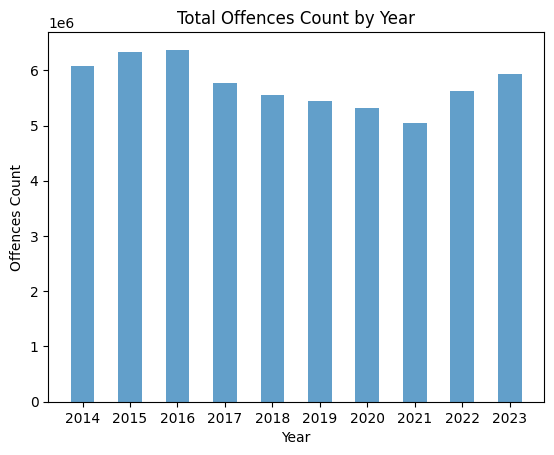

In [31]:
total_offences = filtered_rows[filtered_rows['2014 offence or offence category'] == 'total offences']
offences_count = total_offences.values[:, 1:].flatten()
years = np.arange(2014, 2014 + len(offences_count), 1)

plt.figure()

plt.bar(years, offences_count, width=0.5, align='center', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Offences Count')
plt.title('Total Offences Count by Year')
plt.xticks(years)  # Ensure the x-ticks show up correctly

plt.show()